In [1]:
#%run "../scripts/utility_readblt_fake.py" "fake3mu"

In [7]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline

#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

In [3]:
pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/fake/fake3mu/"
#cuts = 'lepton3_iso <0.15 '
cuts = ' met < 50 '# & lepton3_iso <0.15'

Data = LoadDataframe(pickledir + "data2016").query(cuts)
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)

MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)
MCfake = pd.concat([MCtt,MCt,MCdy],ignore_index=True)

In [4]:
Data2 = Data.query('lepton3_iso < 0.15')
MCzz2   = MCzz.query('lepton3_iso < 0.15')
MCfake2 = MCfake.query('lepton3_iso < 0.15')

In [29]:
vvnormal = 1.33
mybins = [10,12.5,15,17.5,20,25,45,65]
mycent = [11.25,13.75,16.25,18.75,22.5,35,55]
#mybins = np.arange(10,55,5)
#mycent = np.arange(10,50,5)+2.5

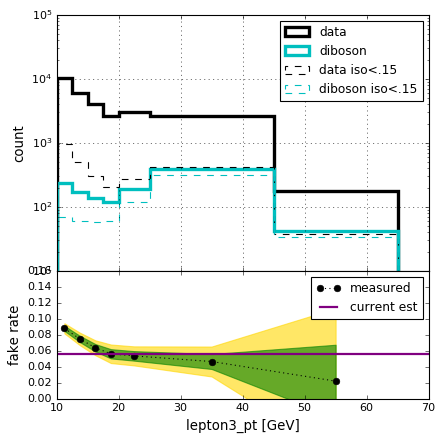

In [30]:
fig, axes = plt.subplots(2, 1, sharex=True, 
                         gridspec_kw={'height_ratios':[2,1]},
                         figsize=(6,6))
fig.subplots_adjust(hspace=0)

ax = axes[0]      
data  = ax.hist(Data.lepton3_pt, bins=mybins, weights=Data.eventWeight, 
                histtype="step",linestyle='-', color='k',lw=3, label='data')
mczz  = ax.hist(MCzz.lepton3_pt, bins=mybins, weights=MCzz.eventWeight*vvnormal, 
                histtype="step",linestyle='-', color='c',lw=3, alpha= 1, label='diboson')


data2 = ax.hist(Data2.lepton3_pt, bins=mybins, weights=Data2.eventWeight, 
                histtype="step",linestyle='--', color='k',lw=1, label='data iso<.15')
mczz2 = ax.hist(MCzz2.lepton3_pt, bins=mybins, weights=MCzz2.eventWeight*vvnormal, 
                histtype="step",linestyle='--', color='c',lw=1, alpha= 1, label='diboson iso<.15')

ax.set_ylabel("count",fontsize=12)
ax.set_yscale('log')
ax.grid(True)
ax.legend(fontsize=11)

ax = axes[1] 

numerator = (data2[0]-mczz2[0])
denominator = (data[0]-mczz[0])

var_numerator = np.histogram(Data2.lepton3_pt, bins=mybins, weights=Data2.eventWeight**2)[0]
var_numerator += np.histogram(MCzz2.eventWeight**2, bins=mybins, weights=(MCzz2.eventWeight*vvnormal)**2)[0]
var_denominator =  np.histogram(Data.lepton3_pt, bins=mybins, weights=Data.eventWeight**2)[0] 
var_denominator += np.histogram(MCzz.eventWeight**2, bins=mybins, weights=(MCzz.eventWeight*vvnormal)**2 )[0]

fakerate = numerator/denominator
std_fakerate = fakerate*(var_numerator/numerator**2+var_denominator/denominator**2 )**0.5


ax.fill_between(mycent,fakerate-2*std_fakerate,fakerate+2*std_fakerate, color = 'gold',alpha=0.6)
ax.fill_between(mycent,fakerate-std_fakerate,fakerate+std_fakerate, color = 'g',alpha=0.6)
ax.plot(mycent,fakerate,"o:", color="k",label='measured')
ax.axhline(0.0566,linestyle="-",color='purple',lw=2,label='current est')
ax.legend(fontsize=11,loc="upper right")
ax.set_ylim(0,0.16)

ax.set_ylabel("fake rate",fontsize=12)
ax.set_xlabel("lepton3_pt [GeV]",fontsize=12)

plt.savefig("fakerate.png",dpi=300)

In [256]:
var_numerator

array([970., 503., 304., 202., 268., 420.,  37.])

Text(0.5,0,'lepton3_pt [GeV]')

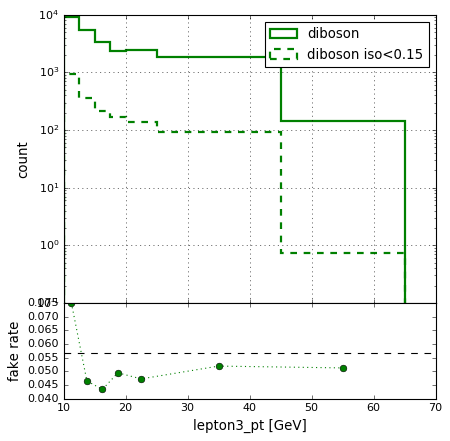

In [221]:
fig, axes = plt.subplots(2, 1, sharex=True, 
                         gridspec_kw={'height_ratios':[3,1]},
                         figsize=(6,6))
fig.subplots_adjust(hspace=0)

ax = axes[0]      


mcfake  = ax.hist(MCfake.lepton3_pt, bins=mybins, weights=MCfake.eventWeight, 
                  histtype="step",linestyle='-', color='g',lw=2, alpha= 1, label='diboson')
mcfake2 = ax.hist(MCfake2.lepton3_pt, bins=mybins, weights=MCfake2.eventWeight, 
                  histtype="step",linestyle='--', color='g',lw=2, alpha= 1, label='diboson iso<0.15')


ax.set_ylabel("count",fontsize=12)
ax.set_yscale('log')
ax.grid(True)
ax.legend()

ax = axes[1] 

macfake = np.histogram(MCfake.lepton3_pt,bins=mybins )
macfake2 = np.histogram(MCfake2.lepton3_pt,bins=mybins )
fakerate = macfake2[0]/macfake[0]
ax.plot(mycent,fakerate,"o:", color="g")

ax.axhline(0.0566,linestyle="--",color='k')

ax.set_ylabel("fake rate",fontsize=12)
ax.set_xlabel("lepton3_pt [GeV]",fontsize=12)

In [127]:
df_list = [ MCt,MCtt, MCdy, MCzz,  Data]
label_list = ['tW','ttbar','V+Jets', 'Diboson', 'data']
color_list = ["#a32020",  "#eb8c00", "deepskyblue", "mediumpurple", "k"]

/home/zchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


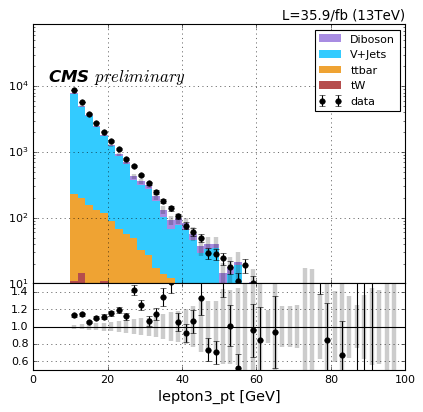

In [133]:
v,a,b,step,xl = "lepton3_pt",0,100,2,"lepton3_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[1,1,1,1])
plotter.settingPlot(xl,label_list,color_list,logscale=True)
plotter.makePlot()

/home/zchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


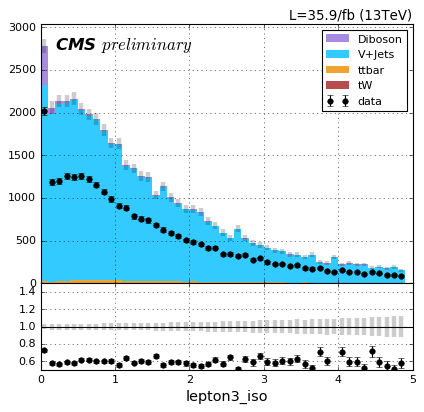

In [14]:
v,a,b,step,xl = "lepton3_iso",0,5,0.1,"lepton3_iso"
plotter = SelectionPlotter(v,a,b,step,df_list)
plotter.settingPlot(xl,label_list,color_list,logscale=False)
plotter.makePlot()